# Juegos cuánticos de dos jugadores

Generalizamos los juegos de dos jugadores al escenario cuántico, donde introducimos el entrelazamiento y la superposición para crear escenarios con equilibrios distintos a los observados en las contrapartidas clásicas de estos problemas.

In [44]:
# Importamos las librerías necesarias para
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram 
from qiskit.quantum_info import Operator
import numpy as np
%matplotlib inline

Definimos una función que toma unos parámetros y nos devuelve operador unitario, que más adelante simbolizará la elección de cada jugador (cada elección con sus parámetros).

In [56]:
def matriz(theta, phi, alpha, delta):
    '''Creamos una matriz unitaria parametrizada con:
        theta, phi, alpha, delta (tipo float)
    '''
    # Matriz unitaria a partir de los parámetros
    U= np.matrix([[exp(-1j*phi)*cos(theta/2),exp(1j*alpha)*sin(theta/2)], 
                  [-exp(-1j*alpha)*sin(theta/2),exp(1j*phi)*cos(theta/2)]])
    
    # Introducimos el parámetro delta como un desfase global
    UU = Operator(np.identity(2)*exp(1j*delta)*U) 
    
    return UU

A continuación definimos la función principal del juego, que toma los parámetros de cada jugador y se genera la simulación del juego correspondiente.

In [46]:
def juego(thetaA,thetaB,phiA,phiB,alphaA,alphaB,deltaA,deltaB):
    '''Simulamos el juego.
    
    Parámetros: thetaA, thetaB, phiA, phiB, 
                alphaA,alphaB,deltaA,deltaB
                
    Ángulos de las matrices de A y B que codifican el juego particular
    
    El programa devuelve el histograma de la simulación
    '''
    
    # Cargamos el simulador Aer
    simulator = Aer.get_backend("qasm_simulator")

    # Creamos un QC 
    qr = QuantumRegister(2, 'q')
    crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
    circuit = QuantumCircuit(qr, crz,crx)

    # Definimos la matriz de entrelazamiento
    I_2 = np.identity(4)    
    X_2 = np.matrix([[0,0,0,1], 
                       [0,0,1,0],
                       [0,1,0,0],
                       [1,0,0,0]])
    J_2 = Operator(1 / np.sqrt(2) * (I_2 + 1j *X_2))  
    J_2_dg = Operator(1 / np.sqrt(2) * (I_2 - 1j *X_2))    # inversa de J_2
    
    
    # Las matrices U_A y U_B son la jugada del jugador A y el jugador B
    
    U_A = matriz(thetaA,phiA,alphaA,deltaA)
    U_B = matriz(thetaB,phiB,alphaB,deltaB)

    # Generamos el circuito
    circuit.append(J_2, [0,1])
    circuit.append(U_A,[0]) # asignamos la puerta UA al jugador 1
    circuit.append(U_B,[1]) # asignamos la puerta UB al jugador 2
    circuit.append(J_2_dg, [0,1])

    # Medimos las qubits
    circuit.measure(qr[0],crz)
    circuit.measure(qr[1],crx)
    

    # Ejecutamos el circuito en el simulador qasm
    job = execute(circuit, simulator,shots=1024)
    
    # Los resultados de job
    result = job.result()
    
    # Contamos los resultados
    counts = result.get_counts(circuit)
    # print(counts,"\n")
    
    # Dibujamos el circuito
    dib = circuit.draw()
    print(dib,"\n")
    
    # Devolvemos el histograma de resultados
    return plot_histogram(counts)

## Ejemplos

En lo que sigue, veamos algunos ejemplos de este algoritmo para estudiar tanto juegos clásicos como cuánticos.

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ Unitary ├┤0         ├┤M├───
       │  Unitary │├─────────┤│  Unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ Unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



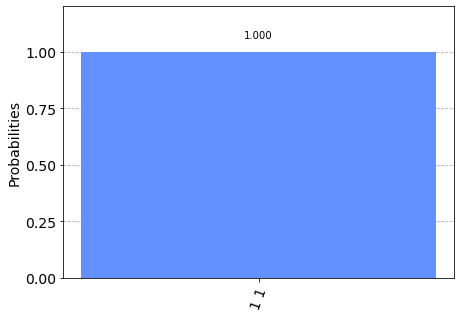

In [47]:
# Ejecutamos el caso clásico
juego(pi,pi,0,0,0,0,0,0)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ Unitary ├┤0         ├┤M├───
       │  Unitary │├─────────┤│  Unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ Unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



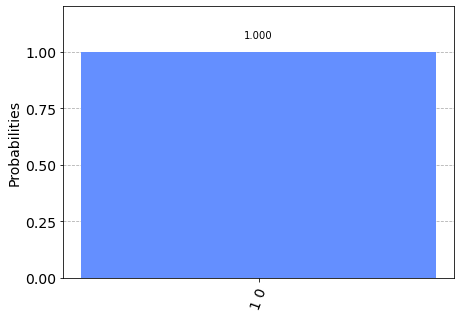

In [48]:
# Caso en el que gana jugador 1
juego(pi,0,0,0,0,0,0,0)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ Unitary ├┤0         ├┤M├───
       │  Unitary │├─────────┤│  Unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ Unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



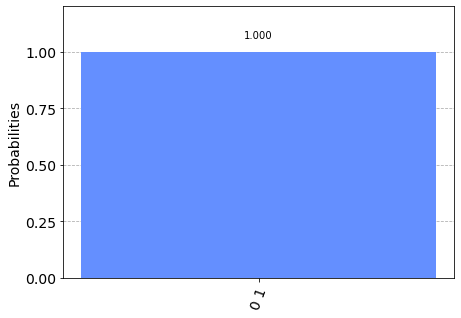

In [49]:
# Caso en el que gana jugador 2
juego(0,pi,0,0,0,0,0,0)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ Unitary ├┤0         ├┤M├───
       │  Unitary │├─────────┤│  Unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ Unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



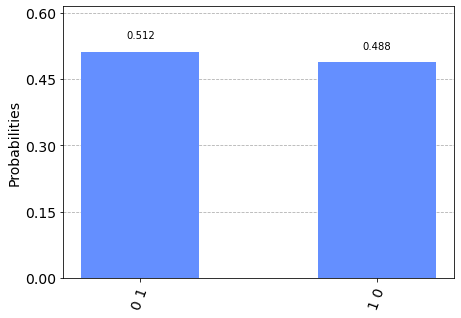

In [50]:
# Caso del prisionero cuántico
juego(0,pi,pi/4,0,0,3*pi/2,pi/4,pi/2)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ Unitary ├┤0         ├┤M├───
       │  Unitary │├─────────┤│  Unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ Unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



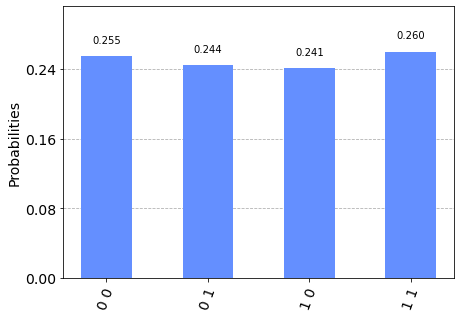

In [51]:
# Juego con opciones equiprobables
juego(pi/2,pi/2,pi/2,0,0,pi/2,pi/2,0)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ Unitary ├┤0         ├┤M├───
       │  Unitary │├─────────┤│  Unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ Unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



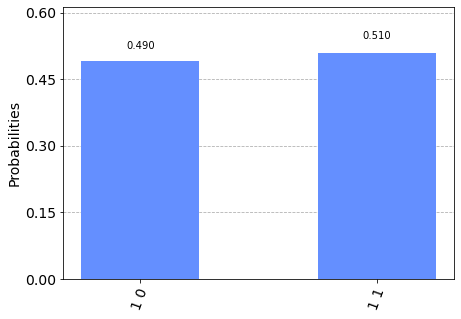

In [52]:
# Juego asimétrico
juego(pi/2,0,pi/2,0,0,pi/2,pi,0)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ Unitary ├┤0         ├┤M├───
       │  Unitary │├─────────┤│  Unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ Unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



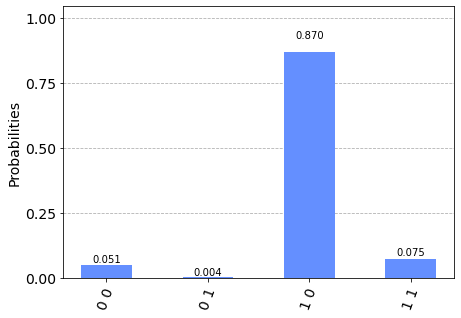

In [53]:
# Otro juego
juego(pi/2,3*pi/4,pi/3,0,0,pi/5,pi,pi/7)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ Unitary ├┤0         ├┤M├───
       │  Unitary │├─────────┤│  Unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ Unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



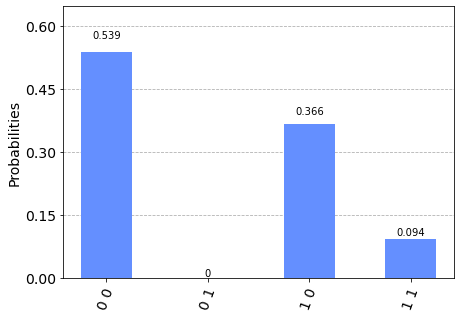

In [54]:
# Otro juego
juego(3,2,1,1,2,pi,2,0.5)

Finalmente, mencionamos que también podríamos haber usado las puertas de qiskit NOT y S de Qiskit para programar el caso del prisionero. Vemos que las aparentemente complicadas matrices unitarias se reducen en este caso a la puerta X de Pauli y una puerta que añade un desfase entre qubits.

       ┌──────────┐┌───┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ X ├┤0         ├┤M├───
       │  Unitary │├───┤│  Unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ S ├┤1         ├─╫─┤M├
       └──────────┘└───┘└──────────┘ ║ └╥┘
crz: 1/══════════════════════════════╩══╬═
                                     0  ║ 
                                        ║ 
crx: 1/═════════════════════════════════╩═
                                        0  



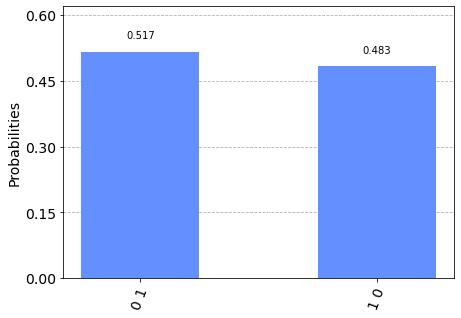

In [55]:

simulator = Aer.get_backend("qasm_simulator")


qr = QuantumRegister(2, 'q')
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
circuit = QuantumCircuit(qr, crz,crx)

I_2 = np.identity(4)
X_2 = np.matrix([[0,0,0,1], 
                   [0,0,1,0],
                   [0,1,0,0],
                   [1,0,0,0]])
J_2 = Operator(1 / np.sqrt(2) * (I_2 + 1j *X_2))  
J_2_dg = Operator(1 / np.sqrt(2) * (I_2 - 1j *X_2))


circuit.append(J_2, [0,1])
circuit.x(0)        # asignamos la puerta X al jugador 1
circuit.s(1)        # asignamos la puerta S al jugador 2
circuit.append(J_2_dg, [0,1])


circuit.measure(qr[0],crz)
circuit.measure(qr[1],crx)


job = execute(circuit, simulator,shots=1024)

result = job.result()
counts = result.get_counts(circuit)
dib = circuit.draw()

print(dib,"\n")
plot_histogram(counts)